In [1]:
import pandas as pd
import matplotlib.pylab as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

In [2]:
ds=pd.read_csv(r"C:\Users\arunf\OneDrive\Documents\Data Science\Machine Learning\DataSet\iris (4).csv")

In [3]:
ds

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
def norm_func(i):
    x=(i-i.mean()/i.std())
    return (x)

In [5]:
ds_norm=norm_func(ds.iloc[:,:4])

In [6]:
ds_norm

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-1.956602,-3.514384,-0.728819,-1.373438
1,-2.156602,-4.014384,-0.728819,-1.373438
2,-2.356602,-3.814384,-0.828819,-1.373438
3,-2.456602,-3.914384,-0.628819,-1.373438
4,-2.056602,-3.414384,-0.728819,-1.373438
...,...,...,...,...
145,-0.356602,-4.014384,3.071181,0.726562
146,-0.756602,-4.514384,2.871181,0.326562
147,-0.556602,-4.014384,3.071181,0.426562
148,-0.856602,-3.614384,3.271181,0.726562


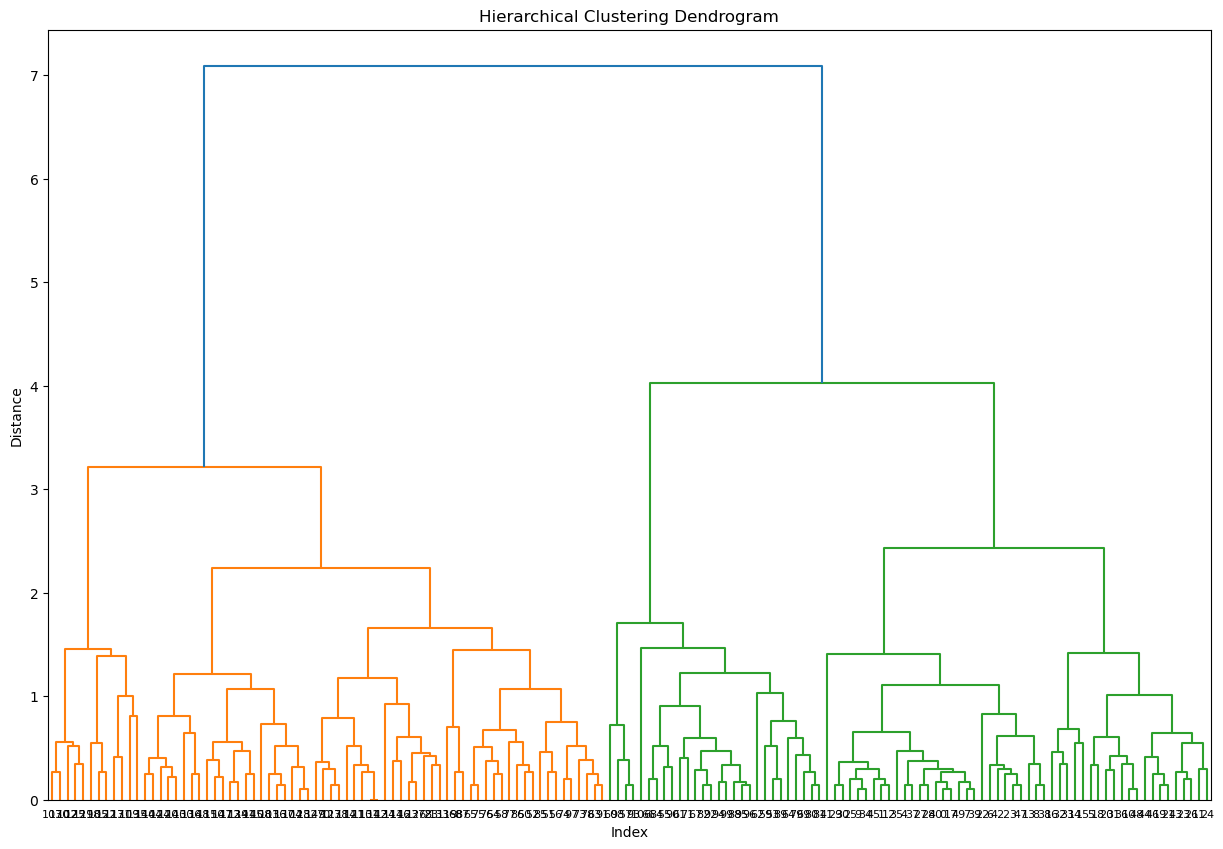

In [8]:
z=linkage(ds_norm,method='complete',metric='euclidean')
plt.figure(figsize=(15,10));plt.title("Hierarchical Clustering Dendrogram");plt.xlabel("Index");plt.ylabel('Distance')
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering as ac
h_complete=ac(n_clusters=3,linkage='complete',affinity='euclidean').fit(ds_norm)

In [16]:
h_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
cluster_label=pd.Series(h_complete.labels_)

In [20]:
cluster_label

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [22]:
ds['cluster']=cluster_label
ds=ds.iloc[:,[5,4,0,1,2,3]]
ds

,cluster,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,0,virginica,6.7,3.0,5.2,2.3
146,0,virginica,6.3,2.5,5.0,1.9
147,0,virginica,6.5,3.0,5.2,2.0
148,0,virginica,6.2,3.4,5.4,2.3


In [23]:
ds.groupby(ds.cluster).mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
cluster,,,,
0,6.545833,2.963889,5.273611,1.850000
1,5.006000,3.428000,1.462000,0.246000
2,5.532143,2.635714,3.960714,1.228571
